# Ejercicio de Exploración y Análisis

## Preguntas a resolver y contexto:

Para este caso estamos trabajando con una editorial que desea analizar los datos disponibles para identificar:

1. Principales editoriales para tomar como referencia (segun numero de reseñas)
2. Principales autores publicados por estas editoriales (según numero de reseñas y rating)
3. Principales categorias publicadas por estas editoriales (según numero de reseñas y rating)

Se utiliza el numero de reseñas como referencia ya que este representa, en cierta medida, la interacción que se tiene con el consumidor final (lectores) y el impacto que las publicaciones tienen en él.

Se importan las librerías relevantes:

In [2]:
import pandas as pd
import random
import matplotlib
from IPython.display import Markdown
from global_variables import CSV_BOOK_DATA_CLEANED_PATH, CSV_BOOK_DATA_PATH
from global_variables import CSV_BOOK_RATING_CLEANED_PATH, CSV_BOOK_RATING_PATH

#from data_quality import prepare_book_data


## Limitar importacion de archivos al 1%

Debido al tamaño de los archivos, se selecciona aleatoriamente el 1% de los datos para iniciar el proceso de exploración y análisis.

In [3]:
#10% de los archivos
p = 0.1
df_books = pd.read_csv("C:/Users/DanielOcampo/Desktop/Trabajo Final/Datasets/books_data.csv", skiprows=lambda i: i>0 and random.random ()>p)
df_rating = pd.read_csv("C:/Users/DanielOcampo/Desktop/Trabajo Final/Datasets/books_rating.csv", skiprows=lambda i: i>0 and random.random ()>p)

In [4]:
print(df_books.shape)
print(df_rating.shape)
df_rating.head()

(21422, 10)
(299405, 10)


,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
1,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
2,0826414346,Dr. Seuss: American Icon,NaN,A2RSSXTDZDUSH4,J. Squire,0/0,5.0,1231200000,Academia At It's Best,When I recieved this book as a gift for Christ...
3,0595344550,Whispers of the Wicked Saints,10.95,A6OQ83FD8E2OC,Read-Aholic,1/4,5.0,1117497600,Loved it !!,I loved this book for a few reasons. The first...
4,0595344550,Whispers of the Wicked Saints,10.95,ASEIU33YVKKWW,"Barbara Steinbach ""A True Fan""",2/3,5.0,1124668800,Whispers of the Wicked Saints,This was a easy to read book that made me want...


## Revisión inicial y limpieza archivo Books_data.csv

In [5]:
df_books.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
1,Guide to Owning a Birman Cat (Popular Cat Libr...,"A guide to the history, feeding, grooming, exh...",['Karen Cummings'],http://books.google.com/books/content?id=yyBPG...,http://books.google.nl/books?id=yyBPGwAACAAJ&d...,Chelsea House Pub,1999-01,http://books.google.nl/books?id=yyBPGwAACAAJ&d...,['Juvenile Nonfiction'],NaN
2,Building the timber frame house: The revival o...,"For centuries, post-and-beam construction has ...",['Tedd Benson'],http://books.google.com/books/content?id=6uxXo...,http://books.google.nl/books?id=6uxXorE4r-UC&p...,Simon and Schuster,1981-09-01,https://play.google.com/store/books/details?id...,['Architecture'],1.0
3,"Mary, Mary",NaN,['United States. Coast Guard'],http://books.google.com/books/content?id=zPAjA...,http://books.google.nl/books?id=zPAjAQAAIAAJ&p...,NaN,1976,https://play.google.com/store/books/details?id...,['Merchant marine'],NaN
4,Voices from the tapes; recordings from the oth...,NaN,['Peter Bander'],NaN,http://books.google.nl/books?id=nzW_uQEACAAJ&d...,NaN,1973,http://books.google.nl/books?id=nzW_uQEACAAJ&d...,['Spiritualism'],NaN


In [6]:
#Función Data Quality
def prepare_book_data(df: pd.DataFrame):
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Se espera un objeto DataFrame de pandas")
    
    #Eliminar columnas que contienen links
    df_cleaned = pd.DataFrame(df)
    df_cleaned = df_cleaned.fillna('')
    columas_eliminar = ["image", "previewLink", "infoLink","ratingsCount"]
    df_cleaned=df_cleaned.drop(columns=columas_eliminar, axis=1)
    
    #Extaer año, convertir nulls en 0 y cambiar el tipo a integer
    df_cleaned['publishedDate'] = df_cleaned['publishedDate'].str.extract(r'(\d{4})')
    df_cleaned['publishedDate'] = df_cleaned['publishedDate'].fillna('0')
    df_cleaned['publishedDate']=df_cleaned['publishedDate'].astype(int)
    
    #Función para eliminar caracteres innecesarios
    def quitar_corchetes(valor):
        if isinstance(valor, str):
            return valor.strip("[]''")
        elif isinstance(valor, list):
            return [v.strip("''") for v in valor]
        else:
            return valor
            
    #Eliminación de caracteres para authors y categories
    df_cleaned['authors'] = df_cleaned['authors'].apply(quitar_corchetes)
    df_cleaned['categories'] = df_cleaned['categories'].apply(quitar_corchetes)
      
    return df_cleaned

def prepare_book_rating(df: pd.DataFrame):
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Se espera un objeto DataFrame de pandas")
     #Eliminar columnas que contienen links
    df_rating_cleaned = pd.DataFrame(df)
    df_rating_cleaned = df_rating_cleaned.fillna('')
    columas_eliminar = ["Price", "review/helpfulness", "review/time","profileName"]
    df_rating_cleaned= df_rating_cleaned.drop(columns=columas_eliminar, axis=1)

    return df_rating_cleaned

In [7]:
df_books_clean = prepare_book_data(df_books)
print(df_books_clean.shape)
df_rating_clean = prepare_book_rating(df_rating)
print(df_rating_clean.shape)

(21422, 6)
(299405, 6)


In [8]:
df_books_clean.head()

,Title,description,authors,publisher,publishedDate,categories
0,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005,Biography & Autobiography
1,Guide to Owning a Birman Cat (Popular Cat Libr...,"A guide to the history, feeding, grooming, exh...",Karen Cummings,Chelsea House Pub,1999,Juvenile Nonfiction
2,Building the timber frame house: The revival o...,"For centuries, post-and-beam construction has ...",Tedd Benson,Simon and Schuster,1981,Architecture
3,"Mary, Mary",,United States. Coast Guard,,1976,Merchant marine
4,Voices from the tapes; recordings from the oth...,,Peter Bander,,1973,Spiritualism


In [9]:
df_rating_clean.head()

,Id,Title,User_id,review/score,review/summary,review/text
0,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
1,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
2,0826414346,Dr. Seuss: American Icon,A2RSSXTDZDUSH4,5.0,Academia At It's Best,When I recieved this book as a gift for Christ...
3,0595344550,Whispers of the Wicked Saints,A6OQ83FD8E2OC,5.0,Loved it !!,I loved this book for a few reasons. The first...
4,0595344550,Whispers of the Wicked Saints,ASEIU33YVKKWW,5.0,Whispers of the Wicked Saints,This was a easy to read book that made me want...


### Se realiza un merge entre ambas bases de datos limpias para identificar los Reviews (Ratings) correspondientes a cada libro de la base Books_data

- en este caso, no hay un primary Key que nos permita hacer una conexión directa entre las tablas, por lo que deberemos utilizar el titulo (columna 'Title') de referencia para hacer la conexión.
- La tabla Ratings (books_ratings.csv) sera la tabla principal en la conexion y se utilizará books_data para traer los detalles de cada libro reseñado
- Se incluye un segundo proceso de limpieza para asegurarnos de tener la información relevante para el cliente: Reseñas por autor, editorial y/o categorias

In [10]:
df_books_full = df_rating_clean.merge(df_books_clean, on='Title', how='left')
df_books_full.head()


,Id,Title,User_id,review/score,review/summary,review/text,description,authors,publisher,publishedDate,categories
0,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005.0,Biography & Autobiography
1,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005.0,Biography & Autobiography
2,0826414346,Dr. Seuss: American Icon,A2RSSXTDZDUSH4,5.0,Academia At It's Best,When I recieved this book as a gift for Christ...,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005.0,Biography & Autobiography
3,0595344550,Whispers of the Wicked Saints,A6OQ83FD8E2OC,5.0,Loved it !!,I loved this book for a few reasons. The first...,NaN,NaN,NaN,NaN,NaN
4,0595344550,Whispers of the Wicked Saints,ASEIU33YVKKWW,5.0,Whispers of the Wicked Saints,This was a easy to read book that made me want...,NaN,NaN,NaN,NaN,NaN


In [11]:
#Función Data Quality
def prepare_fullbook_data(df: pd.DataFrame):
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Se espera un objeto DataFrame de pandas")
    
    #Eliminar columnas que contienen links
    df_cleaned = pd.DataFrame(df)
    df_cleaned = df_cleaned.fillna('')
    df_cleaned = df_cleaned[
        (df_cleaned['publisher'] != '') |
        (df_cleaned['authors'] != '') |
        (df_books_full['categories'] != '') ]
   
      
    return df_cleaned

In [12]:
df_books_full = prepare_fullbook_data(df_books_full)
df_books_full.shape
df_books_full.head()

,Id,Title,User_id,review/score,review/summary,review/text,description,authors,publisher,publishedDate,categories
0,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005.0,Biography & Autobiography
1,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005.0,Biography & Autobiography
2,0826414346,Dr. Seuss: American Icon,A2RSSXTDZDUSH4,5.0,Academia At It's Best,When I recieved this book as a gift for Christ...,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005.0,Biography & Autobiography
3,0595344550,Whispers of the Wicked Saints,A6OQ83FD8E2OC,5.0,Loved it !!,I loved this book for a few reasons. The first...,,,,,
4,0595344550,Whispers of the Wicked Saints,ASEIU33YVKKWW,5.0,Whispers of the Wicked Saints,This was a easy to read book that made me want...,,,,,


## Exploración de base de datos agrupada (df_books_full)

### Conteo de General

In [13]:
Data_count = df_books_full.nunique().reset_index()
Data_count.columns = ['Variable', 'Frequency']
Data_count

,Variable,Frequency
0,Id,80793
1,Title,77649
2,User_id,171383
3,review/score,5
4,review/summary,228184
5,review/text,272674
6,description,5837
7,authors,6381
8,publisher,2036
9,publishedDate,181


### Frecuencia Autores

- Se calcula el numero de reseñas por autor. 
- Es necesario filtrar los valores nulos del dataset en esta columna ('Authors')

In [14]:
author_name = ""
filtered_authors = df_books_full[df_books_full['authors'] != author_name]
print(filtered_authors.shape)
filtered_authors.head()

(25789, 11)


,Id,Title,User_id,review/score,review/summary,review/text,description,authors,publisher,publishedDate,categories
0,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005.0,Biography & Autobiography
1,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005.0,Biography & Autobiography
2,0826414346,Dr. Seuss: American Icon,A2RSSXTDZDUSH4,5.0,Academia At It's Best,When I recieved this book as a gift for Christ...,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005.0,Biography & Autobiography
26,0791054608,Guide to Owning a Birman Cat (Popular Cat Libr...,A3778VKGYVZ76Q,5.0,The Guide to Owning a Birman Cat (The Guide to...,Wonderful! Karen Cummings writes a book that t...,"A guide to the history, feeding, grooming, exh...",Karen Cummings,Chelsea House Pub,1999.0,Juvenile Nonfiction
35,B0006DWYDW,Building the timber frame house: The revival o...,AWAL894GT5S68,5.0,Outstanding guidebook for building your own ti...,My wife and I built a hybrid timber frame home...,"For centuries, post-and-beam construction has ...",Tedd Benson,Simon and Schuster,1981.0,Architecture


In [15]:
author_counts = filtered_authors['authors'].value_counts().reset_index()
author_counts.columns = ['Author', 'Frequency']
author_counts.sort_values(by='Frequency', ascending=False)
author_counts.head()

,Author,Frequency
0,Ray Bradbury,830
1,Jane Austen,759
2,Harper Lee,514
3,Louis Sachar,397
4,Robert Anson Heinlein,297


In [16]:
#20 autores con más publicaciones
frecuency_authors = filtered_authors[['authors']].value_counts().head(20)
frecuency_authors

authors              
Ray Bradbury             830
Jane Austen              759
Harper Lee               514
Louis Sachar             397
Robert Anson Heinlein    297
Gary Paulsen             294
Ernest Hemingway         257
John Steinbeck           196
Barbara Kingsolver       182
Charlotte Brontë         177
Lance Armstrong          171
Jules Verne              169
S. E. Hinton             168
Wally Lamb               162
Orson Scott Card         158
William Golding          146
Charles Dickens          143
Jean M. Auel             139
Jacqueline Carey         130
James Patterson          111
dtype: int64

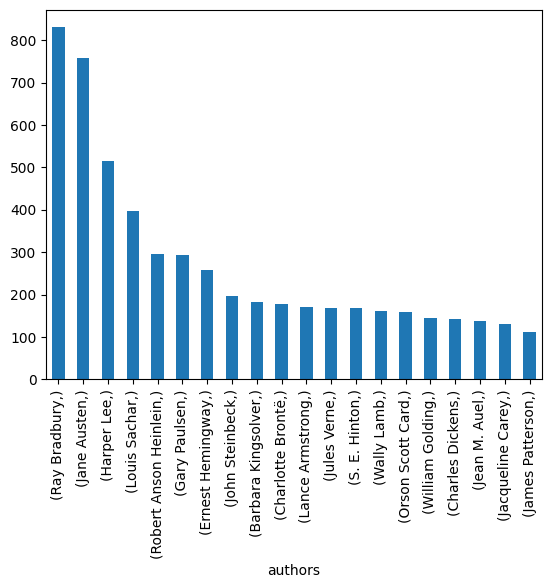

In [17]:
ax = frecuency_authors.plot.bar(column = ['authors'])


In [18]:
Most_review_aut = author_counts.iloc[0,0]
reviews_aut = author_counts.iloc[0,1]
print(F"El autor con mayor numero de reseñas es {Most_review_aut} con {reviews_aut} reseñas")

El autor con mayor numero de reseñas es Ray Bradbury con 830 reseñas


### Frecuencia Categorias

- Se calcula la frecuencia de reseñas por categoria
- se filtran las categorías nulas

In [19]:
Category_name = ""
filtered_categories = df_books_full[df_books_full['categories'] != Category_name]
print(filtered_categories.shape)
filtered_categories.head()

(24153, 11)


,Id,Title,User_id,review/score,review/summary,review/text,description,authors,publisher,publishedDate,categories
0,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005.0,Biography & Autobiography
1,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005.0,Biography & Autobiography
2,0826414346,Dr. Seuss: American Icon,A2RSSXTDZDUSH4,5.0,Academia At It's Best,When I recieved this book as a gift for Christ...,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005.0,Biography & Autobiography
26,0791054608,Guide to Owning a Birman Cat (Popular Cat Libr...,A3778VKGYVZ76Q,5.0,The Guide to Owning a Birman Cat (The Guide to...,Wonderful! Karen Cummings writes a book that t...,"A guide to the history, feeding, grooming, exh...",Karen Cummings,Chelsea House Pub,1999.0,Juvenile Nonfiction
35,B0006DWYDW,Building the timber frame house: The revival o...,AWAL894GT5S68,5.0,Outstanding guidebook for building your own ti...,My wife and I built a hybrid timber frame home...,"For centuries, post-and-beam construction has ...",Tedd Benson,Simon and Schuster,1981.0,Architecture


In [20]:
Category_counts = filtered_categories['categories'].value_counts().reset_index()
Category_counts.columns = ['Category', 'Frequency']
Category_counts.sort_values(by='Frequency', ascending=False)
Category_counts.head()

,Category,Frequency
0,Fiction,8762
1,Juvenile Fiction,2044
2,Biography & Autobiography,1273
3,Religion,822
4,History,812


In [21]:
#20 categorias con más publicaciones
frecuency_category = filtered_categories['categories'].value_counts().head(20)
frecuency_category

Fiction                      8762
Juvenile Fiction             2044
Biography & Autobiography    1273
Religion                      822
History                       812
Business & Economics          560
Book burning                  494
Social Science                359
Computers                     351
Family & Relationships        320
Self-Help                     319
Body, Mind & Spirit           313
Health & Fitness              304
Cooking                       304
Travel                        246
Philosophy                    237
Sports & Recreation           225
Education                     194
Juvenile Nonfiction           190
Political Science             181
Name: categories, dtype: int64

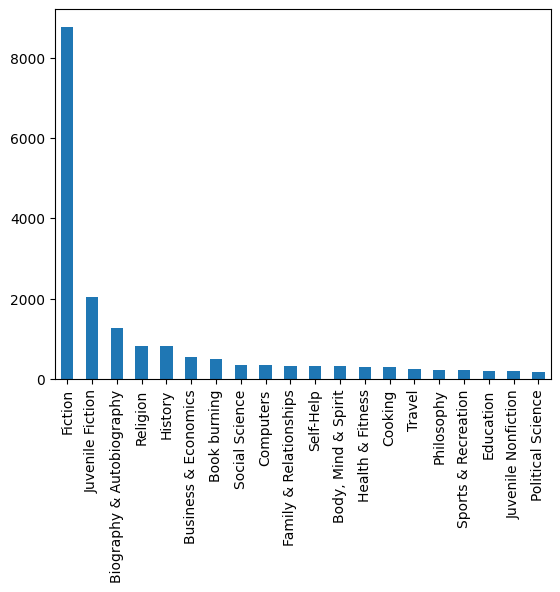

In [22]:
ax = frecuency_category.plot.bar(column = ['categories'])


In [23]:
Most_reviewed_cats = Category_counts.iloc[0,0]
Reviewed_cats = Category_counts.iloc[0,1]
print(F"La categoria con más publicaciones es {Most_reviewed_cats} con {Reviewed_cats} libros")

La categoria con más publicaciones es Fiction con 8762 libros


## Análisis de competencia (Editoriales)

Se hará un analisis más profundo al comportamiento de las reseñas para las 5 editoriales con mayor número de reseñas.

In [24]:
Publisher_name = ""
filtered_publishers = df_books_full[df_books_full['publisher'] != Publisher_name]
print(filtered_publishers.shape)
filtered_publishers.head()

(22203, 11)


,Id,Title,User_id,review/score,review/summary,review/text,description,authors,publisher,publishedDate,categories
0,0826414346,Dr. Seuss: American Icon,A3UH4UZ4RSVO82,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t...",Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005.0,Biography & Autobiography
1,0826414346,Dr. Seuss: American Icon,A22X4XUPKF66MR,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005.0,Biography & Autobiography
2,0826414346,Dr. Seuss: American Icon,A2RSSXTDZDUSH4,5.0,Academia At It's Best,When I recieved this book as a gift for Christ...,Philip Nel takes a fascinating look into the k...,Philip Nel,A&C Black,2005.0,Biography & Autobiography
26,0791054608,Guide to Owning a Birman Cat (Popular Cat Libr...,A3778VKGYVZ76Q,5.0,The Guide to Owning a Birman Cat (The Guide to...,Wonderful! Karen Cummings writes a book that t...,"A guide to the history, feeding, grooming, exh...",Karen Cummings,Chelsea House Pub,1999.0,Juvenile Nonfiction
35,B0006DWYDW,Building the timber frame house: The revival o...,AWAL894GT5S68,5.0,Outstanding guidebook for building your own ti...,My wife and I built a hybrid timber frame home...,"For centuries, post-and-beam construction has ...",Tedd Benson,Simon and Schuster,1981.0,Architecture


In [25]:
Publisher_count = filtered_publishers['publisher'].value_counts().reset_index()
Publisher_count.columns = ['Publisher', 'Frequency']
Publisher_count.sort_values(by='Frequency', ascending=False)
Publisher_count.head()

,Publisher,Frequency
0,Penguin,1696
1,Simon and Schuster,1576
2,Harper Collins,1071
3,"Little, Brown,",562
4,Bantam,457


In [26]:
#20 categorias con más publicaciones
frecuency_publisher = filtered_publishers['publisher'].value_counts().head(20)
frecuency_publisher

Penguin                       1696
Simon and Schuster            1576
Harper Collins                1071
Little, Brown,                 562
Bantam                         457
Vintage                        421
Yearling                       413
Hachette UK                    289
John Wiley & Sons              260
Random House                   235
Random House Digital, Inc.     228
Harper                         207
Tor Books                      206
W. W. Norton & Company         202
HarperCollins                  196
Macmillan                      192
Faber & Faber                  189
Anchor                         180
Ballantine Books               180
Hueber Verlag                  179
Name: publisher, dtype: int64

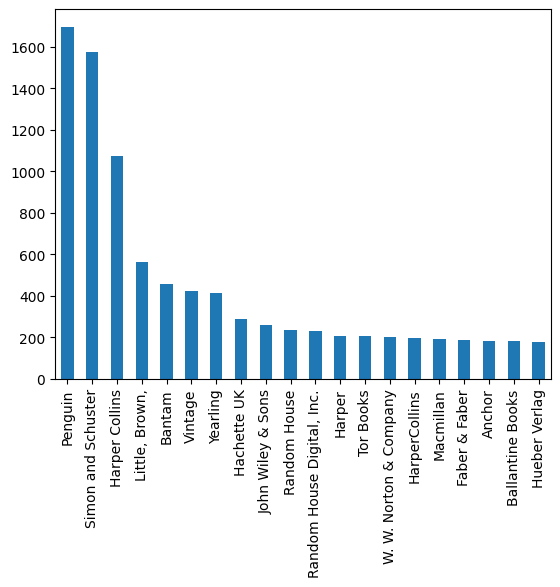

In [27]:
ax = frecuency_publisher.plot.bar(column = ['publisher'])


In [28]:
Top_publisher = Publisher_count.iloc[0,0]
second_top = Publisher_count.iloc[1,0]
third_top = Publisher_count.iloc[2,0]
fourth_top = Publisher_count.iloc[3,0]
fifth_top = Publisher_count.iloc[4,0]
Publish_count = Publisher_count.iloc[0,1]
second_count = Publisher_count.iloc[1,1]
third_count = Publisher_count.iloc[2,1]
fourth_count = Publisher_count.iloc[3,1]
fifth_count = Publisher_count.iloc[4,1]
print(F"""Las editoriales con mayor número de reseñas son '{Top_publisher}' ({Publish_count} reseñas), 
'{second_top}' ({second_count} reseñas), '{third_top}' ({third_count} reseñas), 
'{fourth_top}' ({fourth_count} reseñas) y '{fifth_top}' ({fifth_count} reseñas). 
Estas serán nuestro punto de referencia para el análisis de aquí en adelante.""")

Las editoriales con mayor número de reseñas son 'Penguin' (1696 reseñas), 
'Simon and Schuster' (1576 reseñas), 'Harper Collins' (1071 reseñas), 
'Little, Brown,' (562 reseñas) y 'Bantam' (457 reseñas). 
Estas serán nuestro punto de referencia para el análisis de aquí en adelante.


In [29]:

top_publishers = df_books_full[
    (df_books_full['publisher'] == Top_publisher) |
    (df_books_full['publisher'] == second_top) |
    (df_books_full['publisher'] == third_top) |
    (df_books_full['publisher'] == fourth_top) |
    (df_books_full['publisher'] == fifth_top) ]
print(top_publishers.shape)
top_publishers.head()

(5362, 11)


,Id,Title,User_id,review/score,review/summary,review/text,description,authors,publisher,publishedDate,categories
35,B0006DWYDW,Building the timber frame house: The revival o...,AWAL894GT5S68,5.0,Outstanding guidebook for building your own ti...,My wife and I built a hybrid timber frame home...,"For centuries, post-and-beam construction has ...",Tedd Benson,Simon and Schuster,1981.0,Architecture
354,0141011890,Outposts,A3KKUNIFVEAHNC,1.0,It was a great book in 1985 but needs updating,I thought I was buying a recently written book...,The New York Times bestselling author of Kraka...,Simon Winchester,Harper Collins,2009.0,History
355,0141011890,Outposts,A3CU3H6Q3RI4Y7,4.0,Dots on a map,I started by listening to the audiobook. In th...,The New York Times bestselling author of Kraka...,Simon Winchester,Harper Collins,2009.0,History
356,0141011890,Outposts,A28JOI8JVHAWYS,5.0,Outposts still out there...,Having visited some of the far-flung places me...,The New York Times bestselling author of Kraka...,Simon Winchester,Harper Collins,2009.0,History
480,0553344021,Lifetimes: The Beautiful Way to Explain Death ...,A1K7GJUBW23R83,5.0,beautiful book,i was looking for a way to introduce the conce...,"When the death of a relative, a friend, or a p...",Bryan Mellonie,Bantam,2009.0,Family & Relationships


### Author and Category Rating

In [73]:
author_counts = top_publishers['authors'].value_counts().reset_index()
author_counts.columns = ['authors', 'Frequency']
author_counts = author_counts.sort_values(by='Frequency', ascending=False)
author_rating = top_publishers.groupby('authors')['review/score'].mean().reset_index()
author_rating = author_counts.merge(author_rating, on='authors', how='right')
author_rating.columns = ['Author', 'Frequency', 'Average Rating']
author_rating.sort_values(by='Frequency', ascending=False, inplace=True)
author_rating.head()

,Author,Frequency,Average Rating
222,Jane Austen,615,4.336585
183,Harper Lee,514,4.513619
414,Robert Anson Heinlein,293,4.382253
168,Gary Paulsen,283,4.388693
248,John Steinbeck,196,4.331633


In [85]:
category_filter = top_publishers[(top_publishers['categories'] != '')]
category_counts = category_filter['categories'].value_counts().reset_index()
category_rating = category_filter.groupby('categories')['review/score'].mean().reset_index()
category_counts.columns = ['categories', 'Frequency']
category_rating = category_counts.merge(category_rating, on='categories', how='right')
category_rating.columns = ['Category', 'Frequency', 'Rating']
category_rating = category_rating.sort_values(by='Frequency', ascending=False)
category_rating.head()

,Category,Frequency,Rating
16,Fiction,2819,4.271728
23,Juvenile Fiction,557,4.346499
4,Biography & Autobiography,327,4.198777
42,Social Science,98,4.193878
47,True Crime,85,2.588235


### Analisis de Sentimiento en las reseñas de las 5 editoriales seleccionadas

In [30]:
# Sentimiento Comentarios
good_indices = top_publishers["review/score"] > 3.1
good_reviews = top_publishers[good_indices]
bad_indices = top_publishers["review/score"] < 2.1
bad_reviews = top_publishers[bad_indices]

#### Comentarios Positivos

In [31]:
author_counts_good = good_reviews['authors'].value_counts().reset_index()
author_counts_good.columns = ['authors', 'Frequency']
author_counts_good = author_counts_good.sort_values(by='Frequency', ascending=False)
author_rating_good = good_reviews.groupby('authors')['review/score'].mean().reset_index()
author_rating_good = author_counts.merge(author_rating_good, on='authors', how='right')
author_rating_good.columns = ['Author', 'Frequency', 'Average Rating']
author_rating_good.sort_values(by='Frequency', ascending=False, inplace=True)
author_rating_good.head()

,Author,Frequency,Average Rating
206,Jane Austen,513,4.756335
173,Harper Lee,459,4.801743
158,Gary Paulsen,240,4.754167
384,Robert Anson Heinlein,239,4.803347
231,John Steinbeck,165,4.727273


In [71]:
category_filter_good = good_reviews[(good_reviews['categories'] != '')]
category_counts_good = category_filter_good['categories'].value_counts().reset_index()
category_rating_good = category_filter_good.groupby('categories')['review/score'].mean().reset_index()
category_counts_good.columns = ['categories', 'Frequency']
category_rating_good = category_counts_good.merge(category_rating_good, on='categories', how='right')
category_rating_good.columns = ['Category', 'Frequency', 'Rating']
category_rating_good = category_rating_good.sort_values(by='Frequency', ascending=False)
category_rating_good.head()

,Category,Frequency,Rating
16,Fiction,2294,4.742807
22,Juvenile Fiction,467,4.753747
4,Biography & Autobiography,267,4.741573
41,Social Science,77,4.675325
19,History,68,4.691176


#### Comentarios Negativos

In [72]:
author_counts_bad = bad_reviews['authors'].value_counts().reset_index()
author_counts_bad .columns = ['authors', 'Frequency']
author_counts_bad  = author_counts_bad.sort_values(by='Frequency', ascending=False)
author_rating_bad = bad_reviews.groupby('authors')['review/score'].mean().reset_index()
author_rating_bad = author_counts_bad.merge(author_rating_bad, on='authors', how='right')
author_rating_bad.columns = ['Author', 'Frequency', 'Average Rating']
author_rating_bad.sort_values(by='Frequency', ascending=False, inplace=True)
author_rating_bad.head()

,Author,Frequency,Average Rating
73,Jane Austen,54,1.537037
126,Patricia Cornwell,45,1.288889
61,Harper Lee,33,1.515152
86,Joyce Carol Oates,25,1.360000
137,Robert Anson Heinlein,22,1.818182


In [82]:
category_filter_bad = bad_reviews[(bad_reviews['categories'] != '')]
category_counts_bad = category_filter_bad['categories'].value_counts().reset_index()
category_rating_bad = category_filter_bad.groupby('categories')['review/score'].mean().reset_index()
category_counts_bad.columns = ['categories', 'Frequency']
category_rating_bad = category_counts_bad.merge(category_rating_bad, on='categories', how='right')
category_rating_bad.columns = ['Category', 'Frequency', 'Rating']
category_rating_bad = category_rating_bad.sort_values(by='Frequency', ascending=False)
category_rating_bad.head()

,Category,Frequency,Rating
8,Fiction,284,1.545775
13,Juvenile Fiction,46,1.500000
29,True Crime,45,1.288889
1,Biography & Autobiography,41,1.219512
7,Family & Relationships,17,1.352941


## Conclusiones

In [86]:
#Variables de conclusion
#Editoriales
Top_publisher = Publisher_count.iloc[0,0]
second_top = Publisher_count.iloc[1,0]
third_top = Publisher_count.iloc[2,0]
fourth_top = Publisher_count.iloc[3,0]
fifth_top = Publisher_count.iloc[4,0]
Publish_count = Publisher_count.iloc[0,1]
second_count = Publisher_count.iloc[1,1]
third_count = Publisher_count.iloc[2,1]
fourth_count = Publisher_count.iloc[3,1]
fifth_count = Publisher_count.iloc[4,1]

#Autores

first_author = author_rating.iloc[0,0]
second_author = author_rating.iloc[1,0]
third_author = author_rating.iloc[2,0]
fourth_author = author_rating.iloc[3,0]
fifth_author = author_rating.iloc[4,0]
review_count1 = author_rating.iloc[0,1]
review_count2 = author_rating.iloc[1,1]
review_count3 = author_rating.iloc[2,1]
review_count4 = author_rating.iloc[3,1]
review_count5 = author_rating.iloc[4,1]
review_rating1 = author_rating.iloc[0,2]
review_rating2 = author_rating.iloc[1,2]
review_rating3 = author_rating.iloc[2,2]
review_rating4 = author_rating.iloc[3,2]
review_rating5 = author_rating.iloc[4,2]

#Categorias

category1 = category_rating.iloc[0,0]
category2 = category_rating.iloc[1,0]
category3 = category_rating.iloc[2,0]
category4 = category_rating.iloc[3,0]
category5 = category_rating.iloc[4,0]
review_count_cat1 = category_rating.iloc[0,1]
review_count_cat2 = category_rating.iloc[1,1]
review_count_cat3 = category_rating.iloc[2,1]
review_count_cat4 = category_rating.iloc[3,1]
review_count_cat5 = category_rating.iloc[4,1]
review_rating_cat1 = category_rating.iloc[0,2]
review_rating_cat2 = category_rating.iloc[1,2]
review_rating_cat3 = category_rating.iloc[2,2]
review_rating_cat4 = category_rating.iloc[3,2]
review_rating_cat5 = category_rating.iloc[4,2]

In [87]:
markdown_text = F"""
### Principales editoriales a analizar

Las editoriales con mayor número de reseñas son 
1. '{Top_publisher}':   {Publish_count} reseñas
2. '{second_top}':      {second_count} reseñas
3. '{third_top}':       {third_count} reseñas 
4. '{fourth_top}':      {fourth_count} reseñas
5. '{fifth_top}':       {fifth_count} reseñas. 

Con base a este resultado, se filtraron todas las reseñas relacionadas a estas 5 editoriales para encontrar:

1. los 5 autores que más reseñas traen a estas editoriales, junto con el Rating promedio por autor
2. las 5 categorias más reseñadas y su rating promedio

### Principales autores

En cuanto a los principales autores publicados por estas editoriales, los 5 que más reseñas traen son:
1. '{first_author}':   {review_count1} reseñas con un promedio de {round(review_rating1,2)} estrellas
2. '{second_author}':  {review_count2} reseñas con un promedio de {round(review_rating2,2)} estrellas
3. '{third_author}':   {review_count3} reseñas con un promedio de {round(review_rating3,2)} estrellas
4. '{fourth_author}':  {review_count4} reseñas con un promedio de {round(review_rating4,2)} estrellas
5. '{fifth_author}':   {review_count5} reseñas con un promedio de {round(review_rating5,2)} estrellas

### Principales Categorias

En cuanto a los principales autores publicados por estas editoriales, los 5 que más reseñas traen son:
1. '{category1}':   {review_count_cat1} reseñas con un promedio de {round(review_rating_cat1,2)} estrellas
2. '{category2}':   {review_count_cat2} reseñas con un promedio de {round(review_rating_cat2,2)} estrellas
3. '{category3}':   {review_count_cat3} reseñas con un promedio de {round(review_rating_cat3,2)} estrellas
4. '{category4}':   {review_count_cat4} reseñas con un promedio de {round(review_rating_cat4,2)} estrellas
5. '{category5}':   {review_count_cat5} reseñas con un promedio de {round(review_rating_cat5,2)} estrellas

"""

display(Markdown(markdown_text))


### Principales editoriales a analizar

Las editoriales con mayor número de reseñas son 
1. 'Penguin':   1696 reseñas
2. 'Simon and Schuster':      1576 reseñas
3. 'Harper Collins':       1071 reseñas 
4. 'Little, Brown,':      562 reseñas
5. 'Bantam':       457 reseñas. 

Con base a este resultado, se filtraron todas las reseñas relacionadas a estas 5 editoriales para encontrar:

1. los 5 autores que más reseñas traen a estas editoriales, junto con el Rating promedio por autor
2. las 5 categorias más reseñadas y su rating promedio

### Principales autores

En cuanto a los principales autores publicados por estas editoriales, los 5 que más reseñas traen son:
1. 'Jane Austen':   615 reseñas con un promedio de 4.34 estrellas
2. 'Harper Lee':  514 reseñas con un promedio de 4.51 estrellas
3. 'Robert Anson Heinlein':   293 reseñas con un promedio de 4.38 estrellas
4. 'Gary Paulsen':  283 reseñas con un promedio de 4.39 estrellas
5. 'John Steinbeck':   196 reseñas con un promedio de 4.33 estrellas

### Principales Categorias

En cuanto a los principales autores publicados por estas editoriales, los 5 que más reseñas traen son:
1. 'Fiction':   2819 reseñas con un promedio de 4.27 estrellas
2. 'Juvenile Fiction':   557 reseñas con un promedio de 4.35 estrellas
3. 'Biography & Autobiography':   327 reseñas con un promedio de 4.2 estrellas
4. 'Social Science':   98 reseñas con un promedio de 4.19 estrellas
5. 'True Crime':   85 reseñas con un promedio de 2.59 estrellas

